In [63]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [64]:
# reading file

path = r'C:\Users\User\Desktop\Excel\tahlil_dade_data.csv'
df = pd.read_csv(path)
df[['attribute']] = df

In [65]:
# split csv file

df[['sepal.length','sepal.width','petal.length','petal.width','variety','-']] = df['attribute'].str.split(';', expand=True)
df.drop(['attribute'], axis=1, inplace=True)
df['name'] = df.index
df[['name','sepal.length','sepal.width','petal.length','petal.width','variety']]

,name,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,145,6.7,3,5.2,2.3,Virginica
146,146,6.3,2.5,5,1.9,Virginica
147,147,6.5,3,5.2,2,Virginica
148,148,6.2,3.4,5.4,2.3,Virginica


In [66]:
# changing data type

column_names = ['sepal.length','sepal.width','petal.length','petal.width']

for column in column_names :
    df[column] = df[column].astype('float')

#df['sepal.length'] = df['sepal.length'].astype('float')
#df['sepal.width'] = df['sepal.width'].astype('float')
#df['petal.length'] = df['petal.length'].astype('float')
#df['petal.width'] = df['petal.width'].astype('float')

In [67]:
# determine data points

Number_of_all_points = len(df)

x1 = df['sepal.length']
x2 = df['sepal.width']
x3 = df['petal.length']
x4 = df['petal.width']

for j in range(5):
    print('x1 value : ' + str(x1[j]) + ' , x2 value : ' + str(x2[j]) + ' , x3 value : ' + str(x3[j]) + ' , x4 value : ' + str(x4[j]))

x1 value : 5.1 , x2 value : 3.5 , x3 value : 1.4 , x4 value : 0.2
x1 value : 4.9 , x2 value : 3.0 , x3 value : 1.4 , x4 value : 0.2
x1 value : 4.7 , x2 value : 3.2 , x3 value : 1.3 , x4 value : 0.2
x1 value : 4.6 , x2 value : 3.1 , x3 value : 1.5 , x4 value : 0.2
x1 value : 5.0 , x2 value : 3.6 , x3 value : 1.4 , x4 value : 0.2


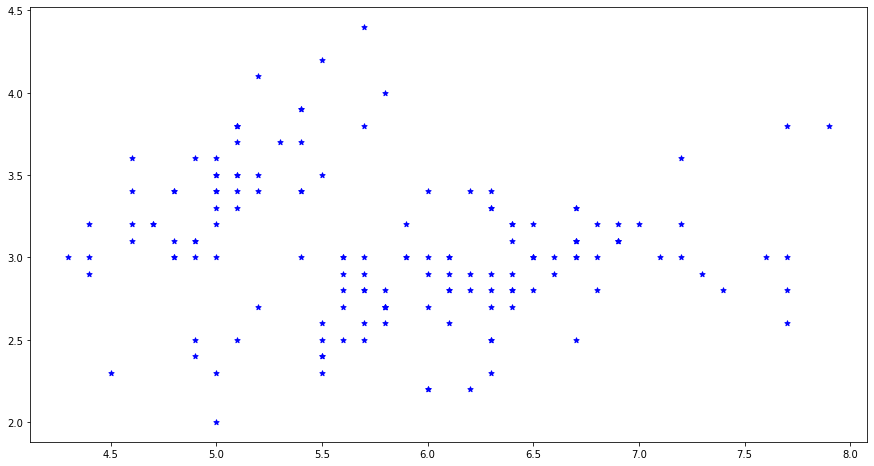

In [68]:
# plot data points (2D)

plt.scatter(x1, x2, label= "stars", color= "blue", marker= "*", s=30)
plt.gcf().set_size_inches((15, 8))
plt.show()

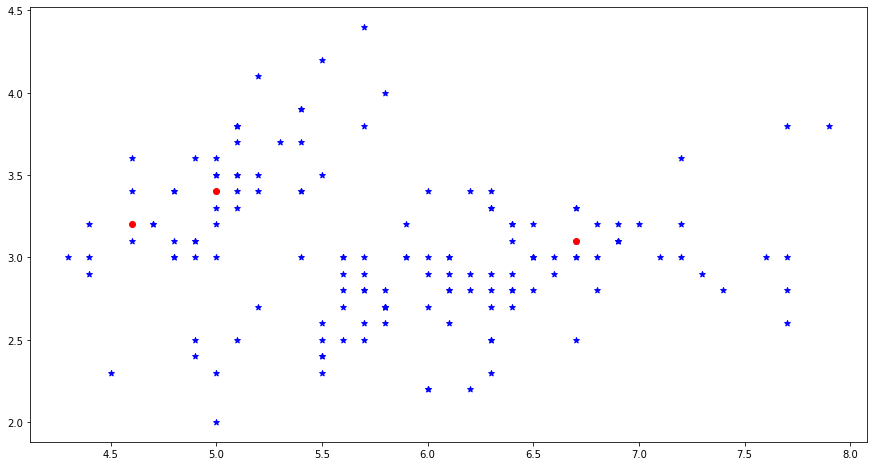

1th center ------> sepal.length : 5.0 , sepal.width : 3.4 , petal.length : 1.5 , petal.width : 0.2
2th center ------> sepal.length : 4.6 , sepal.width : 3.2 , petal.length : 1.4 , petal.width : 0.2
3th center ------> sepal.length : 6.7 , sepal.width : 3.1 , petal.length : 4.7 , petal.width : 1.5


In [69]:
# determine the k random centers

k = 3

def make_mask(data_size, sample_size):
    mask = np.array([True] * sample_size + [False] * (data_size - sample_size))
    np.random.shuffle(mask)
    return mask

mask = make_mask(Number_of_all_points, k)
not_mask = np.invert(mask)

plt.scatter(np.array(x1)[not_mask], np.array(x2)[not_mask], marker="*", color="blue")
plt.scatter(np.array(x1)[mask], np.array(x2)[mask], marker="o", color="red")
plt.gcf().set_size_inches((15,8))
plt.show()

for i in range(k):
    print( str(i+1) + 'th center ------> ' + 'sepal.length : ' + str(np.array(x1)[mask][i]) + ' , sepal.width : ' + str(np.array(x2)[mask][i]) + ' , petal.length : ' + str(np.array(x3)[mask][i]) + ' , petal.width : ' + str(np.array(x4)[mask][i]))

In [70]:
# define clusters

cluster = []
for i in range(k):
    cluster.append([])
    cluster[i].append([np.array(x1)[mask][i],np.array(x2)[mask][i],np.array(x3)[mask][i],np.array(x4)[mask][i]])

In [71]:
# calculate the distance between center i and data point j

for j in range(Number_of_all_points - k):
    distance = []
    for i in range(k):
        distance.append(math.sqrt((np.array(x1)[not_mask][j] - np.array(x1)[mask][i]) ** 2 + (np.array(x2)[not_mask][j] - np.array(x2)[mask][i]) ** 2 + (np.array(x3)[not_mask][j] - np.array(x3)[mask][i]) ** 2 + (np.array(x4)[not_mask][j] - np.array(x4)[mask][i]) ** 2))
    cluster[distance.index(min(distance))].append([np.array(x1)[not_mask][j],np.array(x2)[not_mask][j],np.array(x3)[not_mask][j],np.array(x4)[not_mask][j]])
for i in range(k):
    res = []
    [res.append(x) for x in cluster[i] if x not in res]
    cluster[i] = res

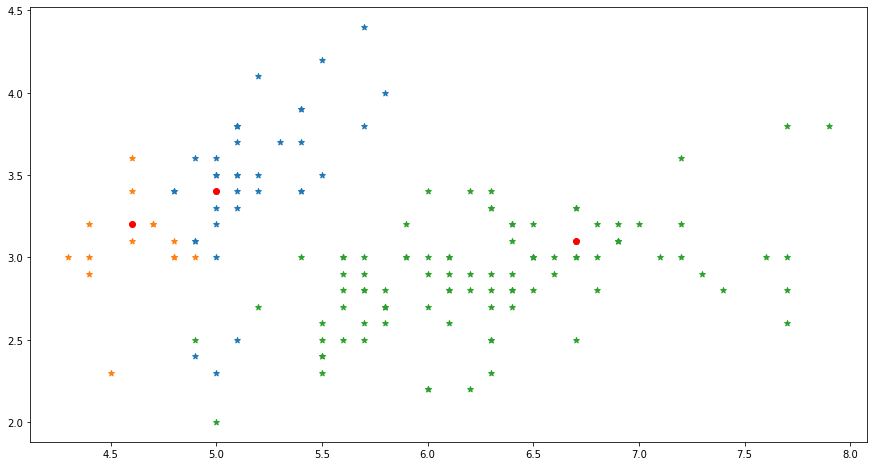

In [72]:
# Coloring of primary clusters

colors = sns.color_palette(None, k)
for i in range(len(cluster)):
    plt.scatter(np.array(cluster[i])[:,0], np.array(cluster[i])[:,1], marker="*", color=colors[i])
plt.scatter(np.array(x1)[mask], np.array(x2)[mask], marker="o", color="red")
plt.gcf().set_size_inches((15, 8))
plt.show()

In [73]:
# Repeat the algorithm until the center points are not moved

primary_mean_points = []
for i in range(k):
    primary_mean_points.append([np.array(x1)[mask][i],np.array(x2)[mask][i],np.array(x3)[mask][i],np.array(x4)[mask][i]])

new_mean_points = []
for i in range(len(cluster)):
    new_mean_points.append([sum(np.array(cluster[i])[:,0])/len(np.array(cluster[i])[:,0]), sum(np.array(cluster[i])[:,1])/len(np.array(cluster[i])[:,1]), sum(np.array(cluster[i])[:,2])/len(np.array(cluster[i])[:,2]), sum(np.array(cluster[i])[:,3])/len(np.array(cluster[i])[:,3])])

while new_mean_points != primary_mean_points :
    cluster = []
    for i in range(k):
        cluster.append([])

    for j in range(Number_of_all_points):
        distance = []
        for i in range(k):
            distance.append(math.sqrt((np.array(x1)[j] - np.array(new_mean_points)[i][0]) ** 2 + (np.array(x2)[j] - np.array(new_mean_points)[i][1]) ** 2 + (np.array(x3)[j] - np.array(new_mean_points)[i][2]) ** 2 + (np.array(x4)[j] - np.array(new_mean_points)[i][3]) ** 2))
        cluster[distance.index(min(distance))].append([np.array(x1)[j],np.array(x2)[j],np.array(x3)[j],np.array(x4)[j]])

    primary_mean_points = new_mean_points
    new_mean_points = []
    for i in range(len(cluster)):
        new_mean_points.append([sum(np.array(cluster[i])[:,0])/len(np.array(cluster[i])[:,0]), sum(np.array(cluster[i])[:,1])/len(np.array(cluster[i])[:,1]), sum(np.array(cluster[i])[:,2])/len(np.array(cluster[i])[:,2]), sum(np.array(cluster[i])[:,3])/len(np.array(cluster[i])[:,3])])

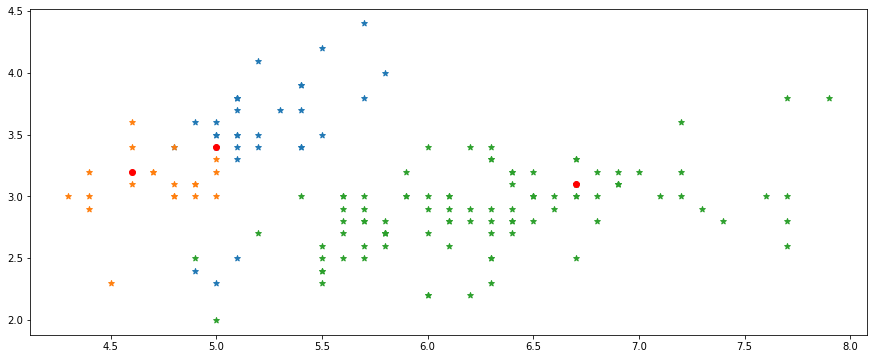

1th center ------> sepal.length : 5.206250000000001 , sepal.width : 3.540625 , petal.length : 1.6718749999999996 , petal.width : 0.35
2th center ------> sepal.length : 4.7 , sepal.width : 3.10952380952381 , petal.length : 1.3904761904761904 , petal.width : 0.20000000000000004
3th center ------> sepal.length : 6.30103092783505 , sepal.width : 2.8865979381443303 , petal.length : 4.958762886597939 , petal.width : 1.6958762886597945


In [74]:
# Coloring of the final clusters

colors = sns.color_palette(None, k)
for i in range(len(cluster)):
    plt.scatter(np.array(cluster[i])[:,0], np.array(cluster[i])[:,1], marker="*", color=colors[i])
plt.scatter(np.array(x1)[mask], np.array(x2)[mask], marker="o", color="red")
plt.gcf().set_size_inches((15, 6))
plt.show()

for i in range(k):
    print( str(i+1) + 'th center ------> ' + 'sepal.length : ' + str(new_mean_points[i][0]) + ' , sepal.width : ' + str(new_mean_points[i][1]) + ' , petal.length : ' + str(new_mean_points[i][2]) + ' , petal.width : ' + str(new_mean_points[i][3]))

In [75]:
# remove unnecessary column

df = df.drop('sepal.length;sepal.width;petal.length;petal.width;variety;', axis=1)

In [76]:
# naming clusters

Class = []
for i in range(len(df)):
    for j in range(len(cluster[0])):
        if df['sepal.length'][i] == cluster[0][j][0] and df['sepal.width'][i] == cluster[0][j][1] and df['petal.length'][i] == cluster[0][j][2] and df['petal.width'][i] == cluster[0][j][3] :
            Class.extend('A')
            break
    for j in range(len(cluster[1])):
        if df['sepal.length'][i] == cluster[1][j][0] and df['sepal.width'][i] == cluster[1][j][1] and df['petal.length'][i] == cluster[1][j][2] and df['petal.width'][i] == cluster[1][j][3] :
            Class.extend('B')
            break
    for j in range(len(cluster[2])):
        if df['sepal.length'][i] == cluster[2][j][0] and df['sepal.width'][i] == cluster[2][j][1] and df['petal.length'][i] == cluster[2][j][2] and df['petal.width'][i] == cluster[2][j][3] :
            Class.extend('C')
            break
df['class'] = Class
df[['name','sepal.length','sepal.width','petal.length','petal.width','variety','class']]

,name,sepal.length,sepal.width,petal.length,petal.width,variety,class
0,0,5.1,3.5,1.4,0.2,Setosa,A
1,1,4.9,3.0,1.4,0.2,Setosa,B
2,2,4.7,3.2,1.3,0.2,Setosa,B
3,3,4.6,3.1,1.5,0.2,Setosa,B
4,4,5.0,3.6,1.4,0.2,Setosa,A
...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Virginica,C
146,146,6.3,2.5,5.0,1.9,Virginica,C
147,147,6.5,3.0,5.2,2.0,Virginica,C
148,148,6.2,3.4,5.4,2.3,Virginica,C
